In [1]:
# Step 1.0: import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2.0: dataframe
df=pd.read_html("https://www.zippia.com/user-experience-designer-jobs/demographics/")

# Step 2.1
df=df[1]

# Step 2.2
df=pd.melt(df,
          id_vars= "Year",
          value_vars=["Male", "Female"],
          var_name="Gender",
          value_name= "Percent")

# Step 2.3 omit the percentage and the type
df["Percent"]=df["Percent"].str.rstrip('%').astype("float")

# Step 2.4 Grouping and manipulation
df=df.astype({"Year": "category","Gender": "category"})
df_group= df.groupby(["Year", "Gender"])


[Text(0.5, 0, '% Gender'), Text(0, 0.5, 'Year')]

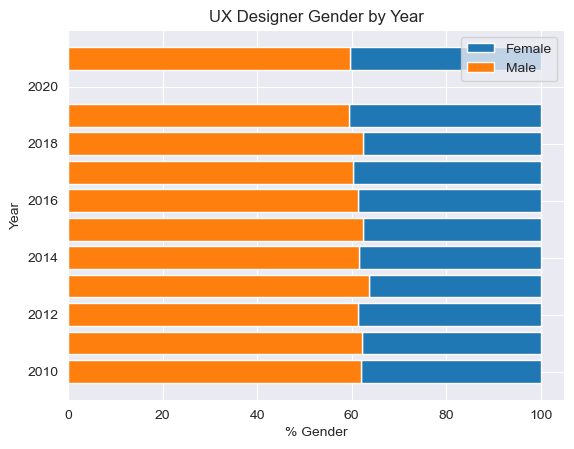

In [9]:
# Step 3.0: matplotlib stacked bar chart
# Step 3.1 
fig,ax= plt.subplots()

# Step 3.2
for idx, o in df_group:
    if o.Gender.item()=="Male":
        ax.barh(o.Year, o.Percent, left=0, label="Male", color="tab:orange")
    else:
        ax.barh(o.Year, o.Percent, left=100-o.Percent, label="Female", color="tab:blue")
ax.legend(["Female", "Male"])
# setting the labels and the title
ax.set_title("UX Designer Gender by Year")
ax.set(xlabel="% Gender", ylabel="Year")


[Text(0.5, 0, '% Gender'), Text(0, 0.5, 'Year')]

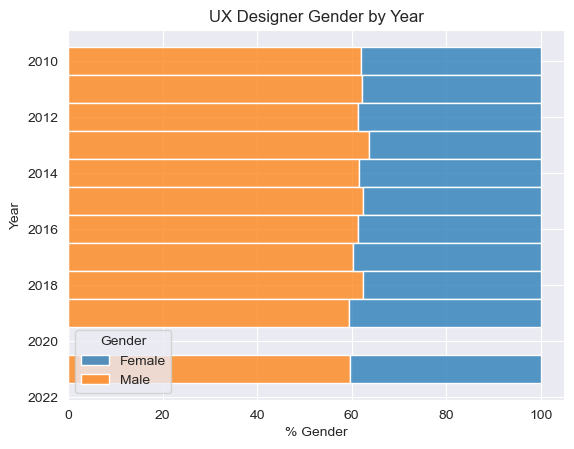

In [10]:
# step 4.0
fig2 , ax2=plt.subplots()
sns.set_style("darkgrid")
sns.histplot(df, y="Year", hue="Gender", weights="Percent", multiple='stack')
ax2.set_title("UX Designer Gender by Year")
ax2.set(xlabel="% Gender", ylabel="Year")

The overall results of both methods were almost similiar but the effort that should be put into that was entirely different. Seaborn make the result quick and intuitive and even the labeling are automated. In contrast, matplotlib needs to understand the details clearly and the steps may be confusing depending on the diagram you choose. 
Based on the discussion we had in class, seaborn is useful in a situation where you need decide quickly for futher steps statistically especially based on the normal data distribution.